# The Probability of the Fall of Acererak

Over the past few modules, we've learned the basics of loops and functions.  In the Functions Module (07), we used a function combined with a while loop to gauge how many times we would need to make a dice roll for the average of those rolls to approach the true mean (within our tolerance threshold). We ran that simulation many times, and, on average, it seemed to converge somewhere between 500 and 1000 rolls. Now, that probably gives us a pretty good idea of what the mean is, but I'm not convinced 1000 rolls is enough for us to get good enough statistics to confidently assess how our damage roll will play out  against ***Acererak the Archlich***.

To recap the situation you're in, Acererak is down to 28 hit points. You are swinging a magic battle axe named ***Lichslayer III***, and we are still going to assume that you hit Acererak (for now). Your axe does 4d12+5 base damage with 2d4+2 bonus damage to Liches. We know that your mean damage roll is 38, so, assuming you hit 38 or better 50% of the time, you have a pretty solid chance of winning this fight. But you don't have a 100% chance of winning this fight, do you?  It's entirely possible that your roll comes back less than 28, in which case, you are looking at a pretty anti-climactic TPK. We're going to do a monte carlo-type simulation to see if we can better assess your chances.  First, we will figure out the probability distribution on the damage roll. By that I mean, what is the probability that you will make a certain damage roll between 13 (minimum) and 63 (maximum). Figuring out the probability that we'll beat 28 based on the dice and modifiers is much more complicated than determining the average. We'll visualize that probability distribution for the damage roll, and then do some basic analysis to figure out the mean (which we expect should be 38 if we've done everything correctly), the variance, and the percentage chance we have of winning the fight under the terms we've laid out here.

This analysis is part of a basic interpretation of probability distributions, which is useful in statistics, data analysis, physical chemistry, reactor design, and many other areas of engineering.  It's worth learning a bit about how we generate a probability distribution for a discrete random variable (i.e., dice rolls on a d6 are either 1,2,3,4,5,6...not a continuous variable that goes from 13 to 63) from a monte carlo simulation, having a look at a probability distribution, and learning how to analyze it just a little.

Here, we will abandon the while loop and instead just use the inner for loop to simulate the outcome of each damage roll from 1 to n. For each roll we make, we will do two things.  First, we will record the total and append it to a running list of totals for damage rolls 1 to n.  Second, based on the result of each roll, we will record the binary result of the battle.  We either win or lose.  If our roll is 28 or better, we win.  If it is lower than 28, we lose.  We can easily do this with an if statement to direct the program to take a different course of action for each result.

We will start by making 1,000 rolls and see how things look.  One important clarification that may be confusing:  We are making n "rolls".  These refer to "n" damage rolls, each of which is 4d12+5 + 2d4+2, not "n" individual dice.  So for each damage roll, we are rolling 4d12's and 2d4's...then adding some modifiers to calculate the total damage roll.  This total is what gets stored on each pass through the for loop.

We'll go through the code together for this example and explain how it works, then we'll have a more complex scenario that you can resolve by adapting the simulation.

## Importing Packages

To start, we will use both pyplot and random in this example, let's import them.

In [1]:
import matplotlib.pyplot as plt
import random
import math

## Build your dice roller

Next, we need to add our dice roller function from Module 07.  Notice how nice it is to have a function that we can use for many different situations by just adapting the arguments (inputs) to that function.

In [2]:
def generator(sides, dice):
    roll  = [random.randint(1,sides) for i in range(1,dice+1)]
    return roll

## Construct a rudimentary Monte Carlo simulation

We are doing a very basic Monte Carlo simulation, which means we will roll the dice a lot of times, calculate the total for each time, and figure out how many times we won or lost based on those outcomes.  If we do it enough times, we get a reasonable approximation of the probability distribution for our damage roll and the probability that we win or lose this particular combat. Again, a disclaimer -- this is probably not the most efficient way to run an MC simulation, but it is logical and clear, so it has educational value in learning how to structure functions, loops, and flow control.  You can work on optimizing it later if that is within the scope of your interests or your course.

To start, we'll use 1000 damage rolls and visualize how well that worked. 

```python
n = 1000
```

We are going to construct this simulation using a for loop.  Each pass through the for loop represents another damage roll.  Every time we make a roll, we will append its value to a list called **damage** that contains the results of each roll.  To start, we will initialize that list as an empty list.  In addition, we will decide after every roll whether we won or lost, and we'll store that outcome as a string in a list called **result**

```python
    damage = []  #Initialize list where we will store all damage rolls.
    result = []  #Initialize list where we will store binary result of combat (win or lose)
```
    
Now we'll write the for loop to cycle through n total damage rolls.

```python
for i in range(0,n):         #A for loop to make n damage rolls and store the results
    roll1 = generator(12, 4) #This is your 4d12 roll
    roll2 = generator(4,  2) #This is your 2d4 roll
    base  = sum(roll1) + 5   #Adding modifier to base
    bonus = sum(roll2) + 2   #Adding modifer to bonus
    total = base + bonus     #Result of the ith damage roll out of n damage rolls.
    damage.append(total)     #Append the ith damage total to list called 'total'
```
        
        
At this point, we are still in the body of the for loop here, and we've just made the ith roll.  I want to now store the result of that roll as a string that tells us whether we won or lost.  We can do that easily with an if statement:

```python
    if total >= 28:
        result.append('Acererak has Fallen!') #If you roll 28 or better, you win.
    else:
        result.append('Total Party Kill!')    #If you don't roll 28 or better, you lose.
```
            
            
Next, the easy part.  We are now returned flush left, and so we are outside of the for loop.  We've made our n damage rolls, and we are just going to count up the number of times we won and the number of times we lost over 1000 combat simulations. There is a built in list method called **count()** that does this for us.

```python
Wins = result.count('Acererak has Fallen!')
Losses = result.count('Total Party Kill!')
```

In [3]:
n = 1000000
damage = []
result = []

for i in range(0,n,1):
    roll1 = generator(12,4)
    roll2 = generator(4,2)
    base  = sum(roll1) + 5
    bonus = sum(roll2) + 2
    total = base + bonus
    damage.append(total)
    if total >= 28:
        result.append('Acererak Has Fallen!')
    else:
        result.append('Total Party Kill')

Wins = result.count('Acererak Has Fallen!')
Losses = result.count('Total Party Kill')

## Analyze the results of your combat simulation

At this point, we've counted the number of times our simulation gave us a win and The probability that we win is given by: 

In [4]:
odds = Wins/(Wins + Losses)
print(odds)
print(Wins + Losses)

0.929283
1000000


This is all we need in order to figure out our chances against Acererak.  But we've also generated enough data to get a full probability distribution out of this Monte Carlo simulation. Learning a bit about probability distributions and how to analyze them is generally useful. Just ask any Reaction Engineering student after they cover residence time distributions for nonideal reactor design.

## Generating a Probability distribution from the simulation

At this point in the script, you have a set of n damage rolls, and you have a list of whether you won or lost each of your n combat attempts. We will process this a just little in order to generate a probability distribution that represents the likelihood of events with this particular damage roll. This might *sound* complicated, but it is actually straightforward to generate a probability distribution for a set of discrete events (i.e., damage rolls of 13, 14, 15, .... 61, 62, 63). 

What we want to plot to visualize the probability distribution is the *percentage of times we hit each damage roll* on the y axis against the *damage roll* itself on the x-axis. The first step is to just to count the number of times we hit each possible result between 13 and 63 when we made our n damage rolls in the Monte Carlo simulation. Again, we'll use the list method count() to do this, this time in a for loop since we want to count multiple different events in our tally. 

### Counting the results

Let's initialize the list where we tally the number of times we made each roll. We'll also want a list of roll values that correspond to each tally. Then we'll write a for loop to count the number of times we hit each damage total and add it to the tally list.

In [5]:
tally = []
roll  = []

for x in range(13, 64, 1):
    roll.append(x)
    tally.append(damage.count(x))

### Visualizing the data

At this point, it is helpful to visualize what we are working with: a tally that tells us the raw number of times we scored each result between 13 and 63 on our n damage rolls.  You can plot it as a scatter plot: 

```python
plt.figure(1, figsize = (6, 5))
plt.scatter(roll, tally, color = 'none', edgecolor = 'black')
plt.xlabel('Total Damage Roll', fontsize = 12)
plt.ylabel('Number of Times Rolled', fontsize = 12)
plt.title(f'Damage Rolls in {n:d} simulations')
plt.show()
```
    
Or, if you prefer, you can create a histogram using a bar chart as shown below:

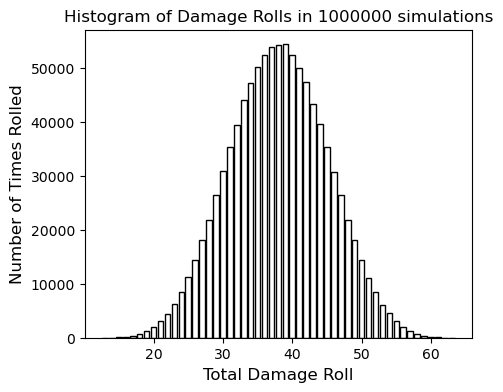

In [6]:
plt.figure(1, figsize = (5, 4))
plt.bar(roll, tally, color = 'none', edgecolor = 'black')
plt.xlabel('Total Damage Roll', fontsize = 12)
plt.ylabel('Number of Times Rolled', fontsize = 12)
plt.title(f'Histogram of Damage Rolls in {n:d} simulations')
plt.show()

Each column or data point represents the number of times (in your n total rolls) you scored each result.  Thinking about this visualization helps us to understand the next step, which requires us to estimate the area under the tally vs. roll curve. If you aren't satisfied at this point that your data set is sufficiently Gaussian, now is a good time to re-reun the simulation with more damage rolls.

### Integrating the histogram

The next part is less intuitive unless you've already taken a probability and statistics course. To convert our raw tally into probability, we want to normalize it such that the total area under the probability distribution curve is 1.  We will do that by dividing each result in our **tally column** by the **integral of tally as a function of roll** evaluated from our minimum roll (13) to our maximum roll (63).

This is tough because we are dealing with a set of discrete events, so we can't calculate an integral in the way we may be used to with a continuous function.  That said, we have numerical quadrature methods, such as the trapezoidal rule, which basically uses geometry to *approximate* the area under a curve:

https://en.wikipedia.org/wiki/Trapezoidal_rule

As usual, with base Python and list collections, we'll do this with a for loop and flex some of those increment operators we learned with while loops.  Note that we could also do this by making a list of the area of each trapezoid at each step in the for loop and summing their values external to the for loop, but this illustration shows you another way to use increment operators.  Note the loop includes a calculation involving the j+1 element, so were only going to go up to the second to last element in the set of possible rolls. Once this loop is done, we have the total area under the curve.  For this particular example, it should be roughly equal to the total number of rolls that we made.  You can double check just to make sure; see if you can rationalize why this is so based on the way you are calculating the integral:

In [7]:
integral = 0
for j in range(0,len(roll)-1):
    integral += (tally[j] + tally[j+1])/2*(roll[j+1] - roll[j])
print(integral)
print(n)

999996.5
1000000


### Normalizing to unit area

Now that we have the normalizing integral, we can convert our raw count into a probability distribution by dividing each count in tally by the normalizing integral. 

In [8]:
prob = [value/integral for value in tally]

Now that we have a probability distribution, we definitely should plot it. The total given by rolling multiple dice and adding them together should have a Gaussian distribution, so plot it and see how much it looks like a Bell-shaped Gaussian distribution (or not):

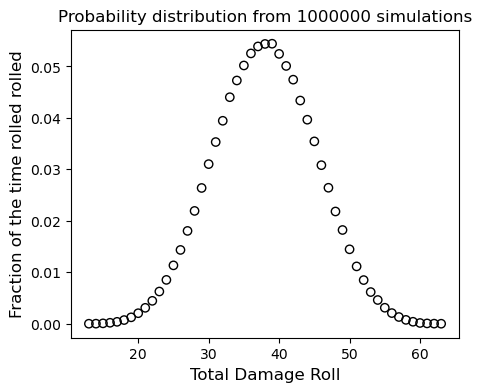

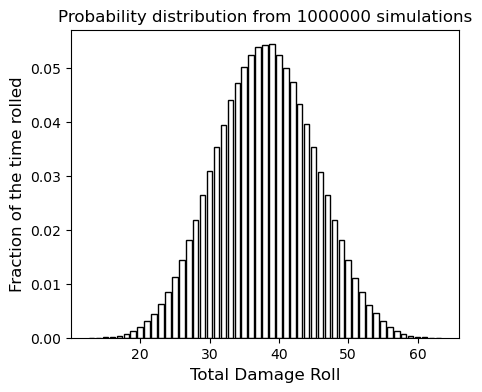

In [9]:
plt.figure(1, figsize = (5, 4))
plt.scatter(roll, prob, color = 'none', edgecolor = 'black')
plt.xlabel('Total Damage Roll', fontsize = 12)
plt.ylabel('Fraction of the time rolled rolled', fontsize = 12)
plt.title(f'Probability distribution from {n:d} simulations')
plt.show()

plt.figure(1, figsize = (5, 4))
plt.bar(roll, prob, color = 'none', edgecolor = 'black')
plt.xlabel('Total Damage Roll', fontsize = 12)
plt.ylabel('Fraction of the time rolled', fontsize = 12)
plt.title(f'Probability distribution from {n:d} simulations')
plt.show()

### Check your normalization...

Before we go any further, let's check our normalization by integrating the probability distribution from the minimum value (13) to the maximum value (63). If we've done everything correctly, it should integrate to 1 since there is a 100% chance we obtain a results between 13 and 63.  We can again approximate that area with the trapezoidal rule. We'll add another plot of the distribution below because we'll talk bout it in the next cell.

The area under the probability distribution is 1.000


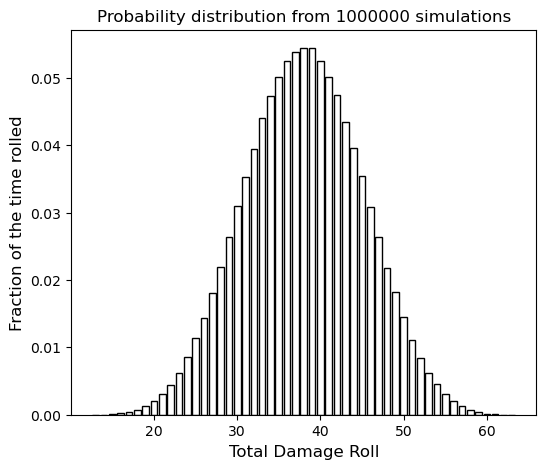

In [10]:
norm = 0 
for j in range(0,len(roll)-1):
        norm += (prob[j] + prob[j+1])/2*(roll[j+1] - roll[j])
print(f'The area under the probability distribution is {norm:0.3f}')

plt.figure(1, figsize = (6, 5))
plt.bar(roll, prob, color = 'none', edgecolor = 'black')
plt.xlabel('Total Damage Roll', fontsize = 12)
plt.ylabel('Fraction of the time rolled', fontsize = 12)
plt.title(f'Probability distribution from {n:d} simulations')
plt.show()

### Extracting information from the probability distribution

Look again at the probability distribution. There is actually a lot of statistical information in a probability distribution. See how the peak is centered at a certain number that looks to be about 38?  That's typical of a gaussian distribution, which is symmetric about the mean.  The height of the probability distribution at any value of "roll" tells us the probability that we make that roll.  So, based on that, we have roughly a 5.5% chance of rolling the mean value of 38 exactly...and we have nearly 0% chance of rolling either a 13 or a 63. The breadth of the peak gives you an idea of the variance (square of standard deviation) in your event.

### Mean value of the distribution

We can calculate the mean and standard deviation of this event once we have the probability distribution. The mean value of the damage roll is given by the "first moment" of the probability distribution, which is the integral of (roll * probability * delta_roll) from the minimum value (13) to the maximum value (63):

$$\bar{r} = \int_{13}^{63}rP(r)dr$$

We can approxoimate that integral using the trapezoidal rule, which we've done a homebrew version of in the cell below (for educational purposes):

You may also note that for a discrete probability distribution such as this one, you can also calculate the mean value from the following summation:

$$\bar{r} = \sum_{i = 13}^{63} r_i P_i$$

Whis is done in the cell below using a list comprehension, again for educational purposes. These will give roughly the same results here as long as we've done a reasonable number of simulations. We can print the result and see how close it is to the true mean (38).

In [11]:
mean = 0 #Initialize the mean.
for j in range(0,len(roll)-1):
    mean += (roll[j+1] + roll[j])/2*(prob[j] + prob[j+1])/2*(roll[j+1] - roll[j])
print(mean)

sum([rval*pval for rval, pval in zip(roll, prob)])


38.00043475152164


38.00055500194248

### Variance and Standard Deviation

Now that we have the mean, we can also calculate the variance ($\sigma$<sup>2</sup>), which is given by the second moment of the probability distribution, i.e, the integral of ( (roll - mean_roll)<sup>2</sup> * (probability) * delta_roll) from 13 to 63:

$$\sigma^2 = \int_{13}^{63}(r - \bar{r})^2P(r)dr$$

Using either the trapezoidal rule or, since it is a discrete distribution, you can calculate the variance with the following summation:

$$\sigma^2 = \sum_{i = 13}^{63} (r_i - \bar{r})^2 P_i$$

Note that the standard deviation is given by the square root of variance.

In [12]:
var = 0 #Initialize the variance.
for j in range(0,len(roll)-1):
    var += ((roll[j+1] + roll[j])/2 - mean)**2 *(prob[j] + prob[j+1])/2*(roll[j+1] - roll[j])
sigma = var**(1/2)
print(sigma)

var = sum([(rval - mean)**2*pval for rval, pval in zip(roll, prob)])
print(var**(1/2))

7.0935183124454495
7.076035406076508


### Calculating the percent chance of success

Finally, we can calculate our percent chance of success by integrating the probability distribution from the lowest successful roll, 28, to the maximum possible roll of 63.

In [13]:
success = 0 #Initialize the integrated area under the curve at 0.
for j in range(0,len(roll)-1):
    if roll[j] < 28:
        pass               #pass just says "do nothing"
    elif roll[j] >= 28:
        success += (prob[j+1] + prob[j])/2*(roll[j+1] - roll[j])

### Assessing the results

Now that we've collected all of that information, let's display the results all in one place.  We'll check to see how your analysis of the probability distribution compares with the odds you calculated directly by counting wins and losses.

In [14]:
print('By counting the wins and losses, the odds that we win the battle are ', round(odds,3))
print('The probability of success we calculated by integrating the probability distribution is ', round(success,3))
print('The mean damage roll is ', round(mean,2))
print('The standard deviation on the damage roll is ', round(var**(1/2),2))
print('The total are under the curve for the probability distribution is ', round(norm,2))

By counting the wins and losses, the odds that we win the battle are  0.929
The probability of success we calculated by integrating the probability distribution is  0.918
The mean damage roll is  38.0
The standard deviation on the damage roll is  7.08
The total are under the curve for the probability distribution is  1.0


Now that you have a feel for what it takes to get the odds on a particular event, here are two problems you should solve independently by adapting the methods given above.

## Wait a minute, this guy is a 1000 year old Lich-wizard with +7 INT.  There's no way his mage armor failed!

Now we will make the problem a little more complex.  You are still a pretty boss berserker, and your battle axe still does 4d12+5 + 2d4+2 damage. ***If it hits Acererak***.

Your eyes must have failed you in the darkness, or perhaps the old wizard had a few tricks up his sleeve yet.  Whatever the reason, just as you're about to swing the axe, a ghostly shield materializes out of thin air, and you see the ancient wizard's body framed in faint blue light. What that means in practice: The shield adds +2 to his armor, and the blue light is a shield spell that he just cast, adding +5 to his armor. That gives him a total AC of 21, and it makes your job just a little harder.  

He still has only 28 hit points, but now you have to hit him before you can even make your damage roll. Now you're a pretty fierce warrior, so normally, you would get 1d20+11 as your attack roll, and contest that against Acererak's armor class. Unfortunately, you are attacking at a disadvantage because your comrades are all down, and you are just plain afraid of Acererak. You are trembling as you swing *Lichslayer III*. 

So here's how disadvantage works out in terms of dice rolls: To make your attack, you will roll 2d20 instead of 1d20, and you have to take the lower result as your attack roll. You still get to add 11 to it because you are a berserker. If that total is greater than or equal to 21, *you hit* Acererak, which is only the first part of this. 

If you hit Acererak, then you can roll your damage roll. The rules are the same as in the first problem. You roll 4d12+5 + 2d4+2.  If you get 28 or better, you win.

***Except....***

Acererak is a really, really bad dude. In the event that you do roll 28 or better - what is theoretically enough to win - He gets a saving throw. If he succeeds on his saving throw, he negates any damage done by your axe through sheer Lich. Now, to do this, *Acererak* makes a roll. He rolls 1d20 + 9.  If he rolls 25 or better, he shrugs off the damage and drops you with a something really lame, like magic missle, for the total party kill.

Write a Monte carlo Simulation to figure out your chance for success in this scenario. You do not need to generate a probability distribution as we did above - that was a distribution for the damage roll alone.  Here you have 3 separate events that combine to determine a binary outcome (win or lose).  So your probability distribution here is just what fraction of times you win + what fraction of times you lose.

In [15]:
n = 1000000
result = []

for i in range(0,n,1):
    
    attack_roll = generator(20,2)
    if attack_roll[0] < attack_roll[1]:
        attack = attack_roll[0]
    else:
        attack = attack_roll[1]
    attack     = attack + 11
    
    if attack < 21: #You don't hit Acererak; game over.
        result.append('Total Party Kill!')
    else: #You do hit Acererak, time to make a damage roll.
        roll1 = generator(12,4)
        roll2 = generator(4,2)
        base  = sum(roll1) + 5
        bonus = sum(roll2) + 2
        total = base + bonus
        if total < 28: #You don't drop Acererak; game over
            result.append('Total Party Kill!')
        else: #You do enough damage to drop Acererak, now he gets a saving throw.
            roll3 = generator(20,1)
            save  = sum(roll3) + 9
            if save >= 25: #Acererak makes his save and ignores damage; game over
                result.append('Total Party Kill!')
            else: #Acererak fails his save; you win!
                result.append('Acererak Has Fallen!')

Wins = result.count('Acererak Has Fallen!')
Losses = result.count('Total Party Kill!')

In [16]:
odds = Wins/(Wins + Losses)
print(odds)

0.211804


## I'll take what's behind door number....

You are on a game show. The host presents you with a choice between 3 doors, and the choice you make will determine your fate in life. Behind one of the doors is your dream job, your dream life. If you pick that door, you get to work at something satisfying, rewarding, and well paid for as long as you want to. Behind the other two doors is misery. If you pick one of them, you get to be a college professor. (***I'm kidding***). Imagine the job in the world you'd hate doing the most - that is what's behind the other two doors...and once you pick it, you are obligated to do it until you are 95 because a) it has no retirement plan and b) once you take this job, you are ineligible for social security.

What lies beyond each door is determined randomly.  No one, including the game show host knows what lies behind each one.  ***You steel your nerve and pick one of the three doors***, because even misery is better than being on a game show right?

But ***just before you open the door that you picked***, the game show host stops you from opening it and says "Wait wait, let's make this a little more interesting!"

The live studio audience roars.

The game show host then ***opens one of the two doors that you didn't pick***. Behind it?  **Misery**.  Keep in mind, the game show host had no idea what was behind any of the doors.

It looks like you dodged at least one bullet, yeah?  But then the game show host turns to you and says:

***"I'll give you one last chance, do you want to change your pick?"***

Write a Monte Carlo simulation to analyze the best course of action.

In [17]:
n = 100000
reject = 0
result = []
switch = 'no'
for i in range(0,n,1):
    
    #What's behind the doors: 1 is good, 0 is bad.
    D1 = random.randint(0,1)
    if D1 == 1:
        D2 = 0
        D3 = 0
    elif D1 == 0:
        D2 = random.randint(0,1)
        if D2 == 1:
            D3 = 0
        elif D2 == 0:
            D3 = 1
    D = [D1,D2,D3]
    
    #Make your pick
    pick = random.randint(0,2)
    outcome = D[pick]
    if outcome == 1: #You picked the winner on your first try.  Deal with the other two doors.
        host_outcome = 0
        remaining_door = 0
    elif outcome == 0: #You picked a loser on your first try, deal with the other two doors.
        remaining_door = 1
    
    if remaining_door == 0 and switch == 'yes':
        result.append('lose')
    if remaining_door == 0 and switch == 'no':
        result.append('win')
    if remaining_door == 1 and switch == 'yes':
        result.append('win')
    if remaining_door == 1 and switch == 'no':
        result.append('lose')

wins   = result.count('win')
losses = result.count('lose')
odds   = wins/(wins + losses)
print(odds)
print(wins + losses)
print(reject)
print(n - reject)
print(f'If switch = {switch:s}, you have a {odds*100:4.2f}% chance of winning')

0.33224
100000
0
100000
If switch = no, you have a 33.22% chance of winning


## Calories in, calories out

For all of the above cases, we've been dealing with discrete random variables.  Again, that means that the values taken on by the variable are not a continuous function, they are discrete values.  In this case, a dice roll will always give you an integer between 1 and the number of sides on that die.

Now we're going to take this up just a little in intensity and present you with a framework that is generally useful in doing something like a monte carlo simulation where the important factors in your model obey some type of known probability distribution?  Gaussian is one example, but you might also have log normal, Poisson, Voigt, or many, many other types of distributions.

There are quite a lot of them, both discrete and continuous.

https://en.wikipedia.org/wiki/List_of_probability_distributions

Here's an illustration of a few of those distributions:

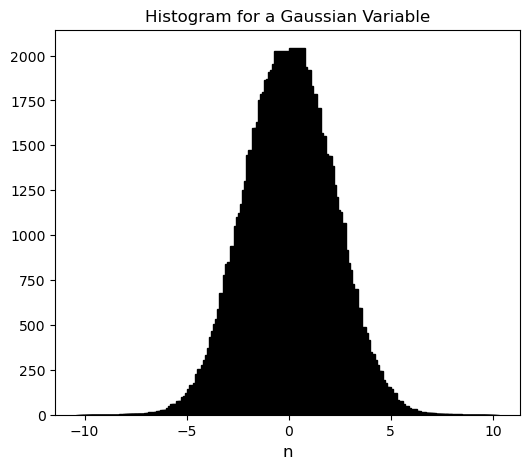

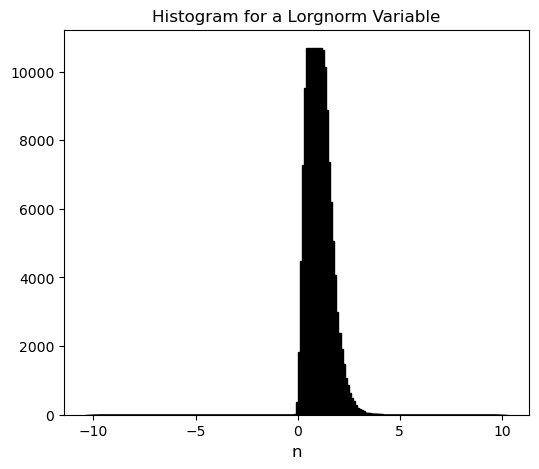

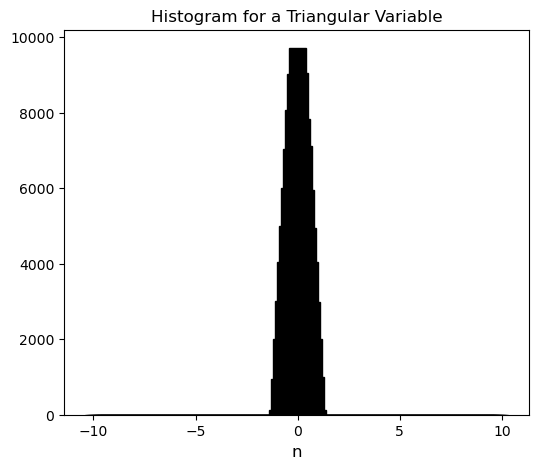

In [18]:
Gaussian   = [random.gauss(0,2) for i in range(0,100000)]
Lognorm    = [random.lognormvariate(0,0.4) for i in range(0,100000)]
Triangular = [random.triangular(-1,1) for i in range(0,100000)]

values = [i/10 for i in range(-100,100)]

#Create a histogram of data generated by these random generators for visualization
countG = []
countL = []
countT = []
for i in values:
    lower = i - 0.05
    upper = i + 0.05
    tempG = []
    tempL = []
    tempT = []
    for n in range(0,len(Gaussian)):
        if lower <= Gaussian[n] <= upper:
            tempG.append(Gaussian[n])
        if lower <= Lognorm[n] <= upper:
            tempL.append(Lognorm[n])
        if lower <= Triangular[n] <= upper:
            tempT.append(Triangular[n])
    countG.append(len(tempG))
    countL.append(len(tempL))
    countT.append(len(tempT))
    
plt.figure(1, figsize = (6, 5))
plt.bar(values, countG, color = 'black', edgecolor = 'black')
plt.xlabel('n', fontsize = 12)
plt.title(f'Histogram for a Gaussian Variable')
plt.show()

plt.figure(2, figsize = (6, 5))
plt.bar(values, countL, color = 'black', edgecolor = 'black')
plt.xlabel('n', fontsize = 12)
plt.title(f'Histogram for a Lorgnorm Variable')
plt.show()

plt.figure(3, figsize = (6, 5))
plt.bar(values, countT, color = 'black', edgecolor = 'black')
plt.xlabel('n', fontsize = 12)
plt.title(f'Histogram for a Triangular Variable')
plt.show()

The heart of Monte Carlo simulations is figuring out which of those distributions apply to the uncertain parameters in your model, and then drawing random numbers from that distribution weighted by the probability of that event occuring.

Let's say I have a few things that determine my daily calorie balance on a day where I both have some type of training session AND I have access to unlimited donuts. Let's break this down because nothing is certain about any of these things. 

I have a reasonably steady average basal metabolic rate around 1800 kcal/day - this is roughly the number of calories I burn if I don't do anything too out of the ordinary.  It will vary up and down some.  Sitting on the couch is lower, maybe a day where I walk to work is higher, but on average, the variance is pretty small. This is a training day, so I'm probably either rowing or on the bike.  Let's say I generally hit 800 kcal in a session, but the variance is large.  Some days I feel great and go up to 1200 or 1400, other days, I bail pretty quick and might only do 200kcal. Let's pretend that my donut consumption is not correlated with my calorie burn.  If I have access, I will eat 7 donuts on average, but there is a bit of variance, and it tends to skew higher than 7.  Let's say on average each donut has 350kcal.

We'll describe each of these variables using probability distributions.  On average, I probably come in close to the mean numbers above, but all of these things vary from day to day.  So we'll pull numbers from relevant probability distributions.

Let's say my BMR is on average, 1600 kcal, and it is described by a normal (Gaussian) distribution with a standard deviation of 125 kcal.  I can draw a random number that obeys that distribution (most likely around 1600, less likely below 1400 or above 1800) using:

```python
BMR = random.gauss(1600,125) #kcal
```

Alright, so I usually eat 7 donuts, but who knows right?  Let's say it is Gaussian, but with constraints. First, I always eat at least 2, so a result less than 2 will be set to 2.  Second, I never eat a fraction of a donut, so I will round up whatever value the gaussian distribution returns.  There is no upper limit on the number of donuts I will eat. Standard deviation: 3 donuts.

```python
Donuts = ceil(random.gauss(7,3)) #donuts
```

I have a preference for things like apple fritters, so they have a lot of calories.  But I won't turn away anything.  Let's say that the calories in my typical donut follow a Gaussian distribution centered at 350 kcal, with a standard deviation of 140, but only upward.  The minimum calories I will consume in a single donut are 350 kcal. There is no upper limit.

```python
D_Cal  = random.gauss(350,140) #kcal
```

My workouts can be described with a triangular distribution centered at 800 calories, but going anywhere from 400 to 1200.

```python
Training = random.triangular(400,800) #kcal
```

Now, I have enough information to run a monte carlo simulation to figure out my typical net calories in a given day.  I would do this with a for loop that runs through maybe 10<sup>6</sup> iterations.  On each pass, I'll draw a random value for BMR, Donuts, D_Cal, and Training, then I'll add them up to get my net total.  Once that's done we can create a histogram from the data, which gives us a pretty good representation of our probability distribution my daily net calorie intake.

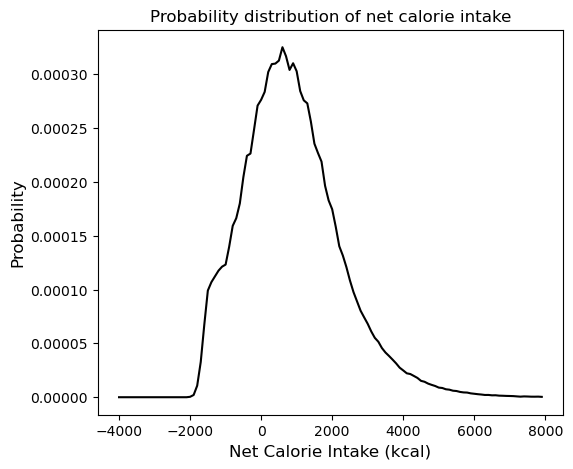

In [19]:
BMR = random.gauss(1600,125) #kcal
Donuts = math.ceil(random.gauss(7,3)) #donuts
D_Cal  = random.gauss(350,140) #kcal
Training = random.triangular(400,800) #kcal

net = []
for n in range(0,1000000):
    BMR = random.gauss(1600,125) #kcal
    Donuts = math.ceil(random.gauss(7,3)) #kcal
    if Donuts < 2:
        Donuts = 2
    D_Cal  = random.gauss(350,140) #kcal
    if D_Cal < 350:
        D_Cal = 350
    Training = random.triangular(400,800) #kcal
    net.append(Donuts*D_Cal - BMR - Training)

#Create a histogram   
values = [i for i in range(-4000,8000,100)]
count_cal = []
for i in values:
    lower = i - 50
    upper = i + 50
    temp  = []
    for n in range(0,len(net)):
        if lower <= net[n] <= upper:
            temp.append(net[n])
    count_cal.append(len(temp))

#Convert to a probability distribution
integral = 0
for j in range(0,len(values)-1):
    integral += (count_cal[j] + count_cal[j+1])/2*(values[j+1] - values[j])

prob = [cals/integral for cals in count_cal]

plt.figure(1, figsize = (6, 5))
plt.plot(values, prob, color = 'black')
plt.xlabel('Net Calorie Intake (kcal)', fontsize = 12)
plt.ylabel('Probability', fontsize = 12)
plt.title(f'Probability distribution of net calorie intake')
plt.show()